In [1]:
%matplotlib inline

import abtem

abtem.config.set({"local_diagnostics.progress_bar": False});

(appendix:conventions)=
# Conventions
As with any simulations, certain conventions need to be adopted when creating a specific modeling implementation. In *ab*TEM, we have tried to be consistent with common sources, but some conventions may differ from what you are used to. For clarity and as a reference, we outline the most important conventions below.

## Propagation direction and defocus

Following Kirkland {cite}`kirkland`, the wave function in *ab*TEM simulations propagates in the $+$`z` direction, and thus the first slice is at the `z` $= 0$ position (ie. bottom) of the simulation cell. Defocus is defined with respect to the entrance (bottom) surface of the simulation cell, with positive values moving the focus upwards into the potential. (Note that the C10 aberration is defined with an opposite sign, `C10 = -defocus`, and both can be used for convenience).

We demonstrate the defocus convention below. The initial probe is shown in the left panel, we see that applying defocus and is equivalent to free-space propagation over a thickness of the same value. The final panel shows that a positive defocus is negated by a positive propagation, i.e. if the probe has a defocus of $50 \ \mathrm{Å}$ the probe is in focus after propagating forward by $50 \ \mathrm{Å}$.

[########################################] | 100% Completed | 104.42 ms


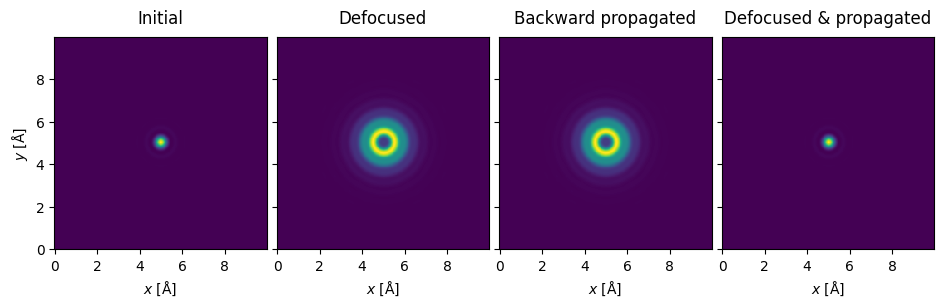

In [3]:
propagator = abtem.multislice.FresnelPropagator()

initial = (
    abtem.Probe(extent=10, gpts=256, energy=200e3, semiangle_cutoff=30)
    .build()
    .compute()
)

defocused = initial.apply_ctf(defocus=50)

backwards_propagated = propagator.propagate(
    initial, thickness=-50
).compute()

propagator = abtem.multislice.FresnelPropagator()

defocused_forward_propagated = propagator.propagate(
    defocused, thickness=50
).compute()

abtem.stack(
    (initial, defocused, backwards_propagated, defocused_forward_propagated),
    ("Initial", "Defocused", "Backward propagated", "Defocused & propagated"),
).show(explode=True, figsize=(10, 5));

## Order of transmission and propagation

When a potential is sliced and used in the multislice calculation, the transmission step is taken before the free-space propagation, and thus effectively the potential within a slice is projected to its bottom surface. (With sufficiently thin slices, this should not matter.)

## Units

*ab*TEM uses the [ASE unit conventions](https://wiki.fysik.dtu.dk/ase/ase/units.html) (where applicable); most importantly, distances are measured in Å, energies in eV, and atomic mass units are defined as 1.0. The electrostatic potential is given in (eV / e).

For convenience, we measure polar angles with respect to the optical axis (e.g. probe convergence angle, detector semiangles) in mrad. Azimuthal angles (e.g. detector segments, aberration angles) are measured in rad.